In [74]:
#Write a program to implement the Naïve Bayesian classifier for a sample training data set stored as a .CSV file. 
#Compute the accuracy of the classifier, considering few test data sets.

# Importing the libraries
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Importing the dataset
dataset = pd.read_csv('User_Data.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values



In [7]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
#x_train


In [16]:
# Feature Scaling
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)
#x_train1


In [17]:
# Feature Scaling
fc = MinMaxScaler()
x_train2 = fc.fit_transform(x_train)
x_test2 = fc.transform(x_test)

In [27]:
df1=pd.DataFrame(x_train1,columns=['A','B'])
df1

,A,B
0,0.581649,-0.886707
1,-0.606738,1.461738
2,-0.012544,-0.567782
3,-0.606738,1.896635
4,1.373907,-1.408584
...,...,...
295,0.977778,-1.147645
296,-0.903834,-0.770734
297,-0.210609,-0.509796
298,-1.101899,-0.451810


In [28]:
df2=pd.DataFrame(x_train2,columns=['A','B'])
df1

,A,B
0,0.581649,-0.886707
1,-0.606738,1.461738
2,-0.012544,-0.567782
3,-0.606738,1.896635
4,1.373907,-1.408584
...,...,...
295,0.977778,-1.147645
296,-0.903834,-0.770734
297,-0.210609,-0.509796
298,-1.101899,-0.451810


In [33]:
dt=pd.concat([df1,df2],axis=1)
dt

,A,B,A,B
0,0.581649,-0.886707,0.619048,0.177778
1,-0.606738,1.461738,0.333333,0.777778
2,-0.012544,-0.567782,0.476190,0.259259
3,-0.606738,1.896635,0.333333,0.888889
4,1.373907,-1.408584,0.809524,0.044444
...,...,...,...,...
295,0.977778,-1.147645,0.714286,0.111111
296,-0.903834,-0.770734,0.261905,0.207407
297,-0.210609,-0.509796,0.428571,0.274074
298,-1.101899,-0.451810,0.214286,0.288889


In [35]:
dataframe=pd.concat([pd.DataFrame(x_train1),pd.DataFrame(x_train2)],axis=1)
dataframe

,0,1,0,1
0,0.581649,-0.886707,0.619048,0.177778
1,-0.606738,1.461738,0.333333,0.777778
2,-0.012544,-0.567782,0.476190,0.259259
3,-0.606738,1.896635,0.333333,0.888889
4,1.373907,-1.408584,0.809524,0.044444
...,...,...,...,...
295,0.977778,-1.147645,0.714286,0.111111
296,-0.903834,-0.770734,0.261905,0.207407
297,-0.210609,-0.509796,0.428571,0.274074
298,-1.101899,-0.451810,0.214286,0.288889


In [36]:
dataframe_test=pd.concat([pd.DataFrame(x_test1),pd.DataFrame(x_test2)],axis=1)
dataframe_test

,0,1,0,1
0,-0.804802,0.504964,0.285714,0.533333
1,-0.012544,-0.567782,0.476190,0.259259
2,-0.309641,0.157046,0.404762,0.444444
3,-0.804802,0.273019,0.285714,0.474074
4,-0.309641,-0.567782,0.404762,0.259259
...,...,...,...,...
95,-1.101899,0.765902,0.214286,0.600000
96,-1.498028,-0.190872,0.119048,0.355556
97,0.977778,-1.060666,0.714286,0.133333
98,0.977778,0.591943,0.714286,0.555556


In [69]:
# Fitting I Bayes to the Training set
classifier = GaussianNB()
classifier.fit(dataframe, y_train)
GaussianNB()


GaussianNB()

In [71]:
# Predicting the Test set results
y_pred = classifier.predict(dataframe_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [72]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[64  4]
 [ 4 28]]


In [73]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.92


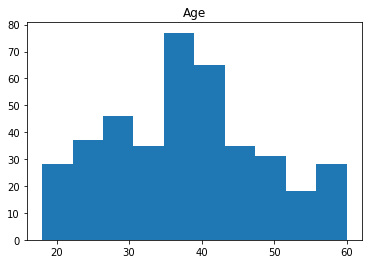

In [75]:
plt.title("Age")
plt.hist(dataset.Age)
plt.show()

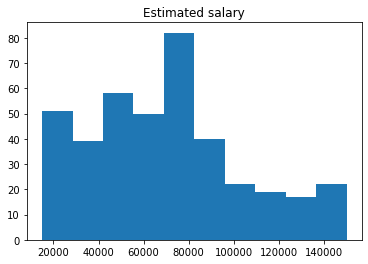

In [76]:
plt.title("Estimated salary")
plt.hist(dataset.EstimatedSalary)
plt.show()